# CPSC 4970 AI + ML: Module 2

In [17]:
import sklearn.datasets
from IPython.core.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

plt.style.use('dark_background')

## Exploratory Data Analysis -- skipping some steps

In [18]:
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
print(db.info())
train, test = train_test_split(db, test_size=0.33)
# X = everything but least column
X_train = db.iloc[:, :-1]
X_test = test.iloc[:, :-1]
# y = target column
y_train = db['target']
y_test = test['target']

display(X_train.head())
display(y_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

## Create linear regression model

Training MSE:  2859.6903987680657
Training R2:  0.5177494254132934
152.1334841628965 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


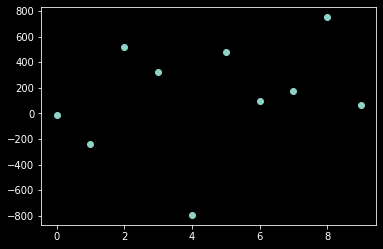

In [19]:
lr = LinearRegression().fit(X_train, y_train)
train_predicted = lr.predict(X_train)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train, y_train))
print(lr.intercept_, lr.coef_)
plt.scatter(range(len(lr.coef_)), lr.coef_)

## Create quadratic model

(65,)
Training MSE:  2416.7872897225006
Training R2:  0.5924394264411934


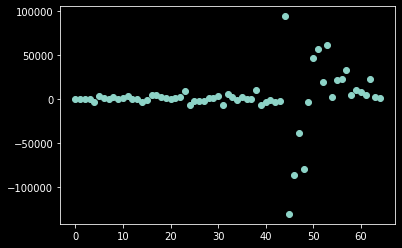

In [20]:
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial.fit(X_train)
X_train_poly = polynomial.transform(X_train)
lr = LinearRegression().fit(X_train_poly, y_train)
train_predicted = lr.predict(X_train_poly)
print(lr.coef_.shape)
plt.scatter(range(len(lr.coef_)), lr.coef_)
print("Training MSE: ", mean_squared_error(y_train, train_predicted))
print("Training R2: ", lr.score(X_train_poly, y_train))